## Import relevant packages

In [86]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
import numpy as np
import dateutil
import datetime
import os
from statistics import mean 
from operator import add
import plotly.express as px
import math
from scipy.stats.stats import pearsonr 
import seaborn as sns
import json
import sys
!{sys.executable} -m pip install tensorflow
import tensorflow as tf

  Using cached tensorflow-2.5.0rc1-cp39-cp39-win_amd64.whl (422.5 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached wrapt-1.12.1-cp39-cp39-win_amd64.whl
  Using cached tensorflow_estimator-2.5.0rc0-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached

You should consider upgrading via the 'c:\users\tuukk\documents\repos\fmi-or-case\t-env\scripts\python.exe -m pip install --upgrade pip' command.


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## Data import
* Import time indexing and raw solar and wind data
* Construct main data frame for solar and wind
* Import temperature data
* Construct temperature dataframe

TODO: 
- Variable naming

In [75]:
df = pd.DataFrame(columns = ['dateupload','datetaken', 'views', 'url', 'sq'])
for i in range(1,23):
    with open(f'userdata/{i}.json') as json_file:
        data = json.load(json_file)
    for i in data['photos']['photo']:
        inp = 0
        try:
            inp = [datetime.datetime.fromtimestamp(int(i['dateupload'])), i['datetaken'], int(i['count_views']),i['url_z'],i['url_sq']]
        except:
            inp = [datetime.datetime.fromtimestamp(int(i['dateupload'])), i['datetaken'], int(i['count_views']),i['url_m'],i['url_sq']]
        df.loc[i['id']] = inp

In [73]:
df.head()

,dateupload,datetaken,views,url,sq
50378842433,2020-09-24 20:09:58,2020-08-31 14:50:43,666,https://live.staticflickr.com/65535/5037884243...,https://live.staticflickr.com/65535/5037884243...
50379538961,2020-09-24 20:09:57,2020-08-31 14:52:36,674,https://live.staticflickr.com/65535/5037953896...,https://live.staticflickr.com/65535/5037953896...
50379539021,2020-09-24 20:09:56,2020-08-31 14:53:33,645,https://live.staticflickr.com/65535/5037953902...,https://live.staticflickr.com/65535/5037953902...
50379719427,2020-09-24 20:09:55,2020-08-31 14:54:48,616,https://live.staticflickr.com/65535/5037971942...,https://live.staticflickr.com/65535/5037971942...
50379539181,2020-09-24 20:09:55,2020-08-31 15:05:38,597,https://live.staticflickr.com/65535/5037953918...,https://live.staticflickr.com/65535/5037953918...


<IPython.core.display.Javascript object>


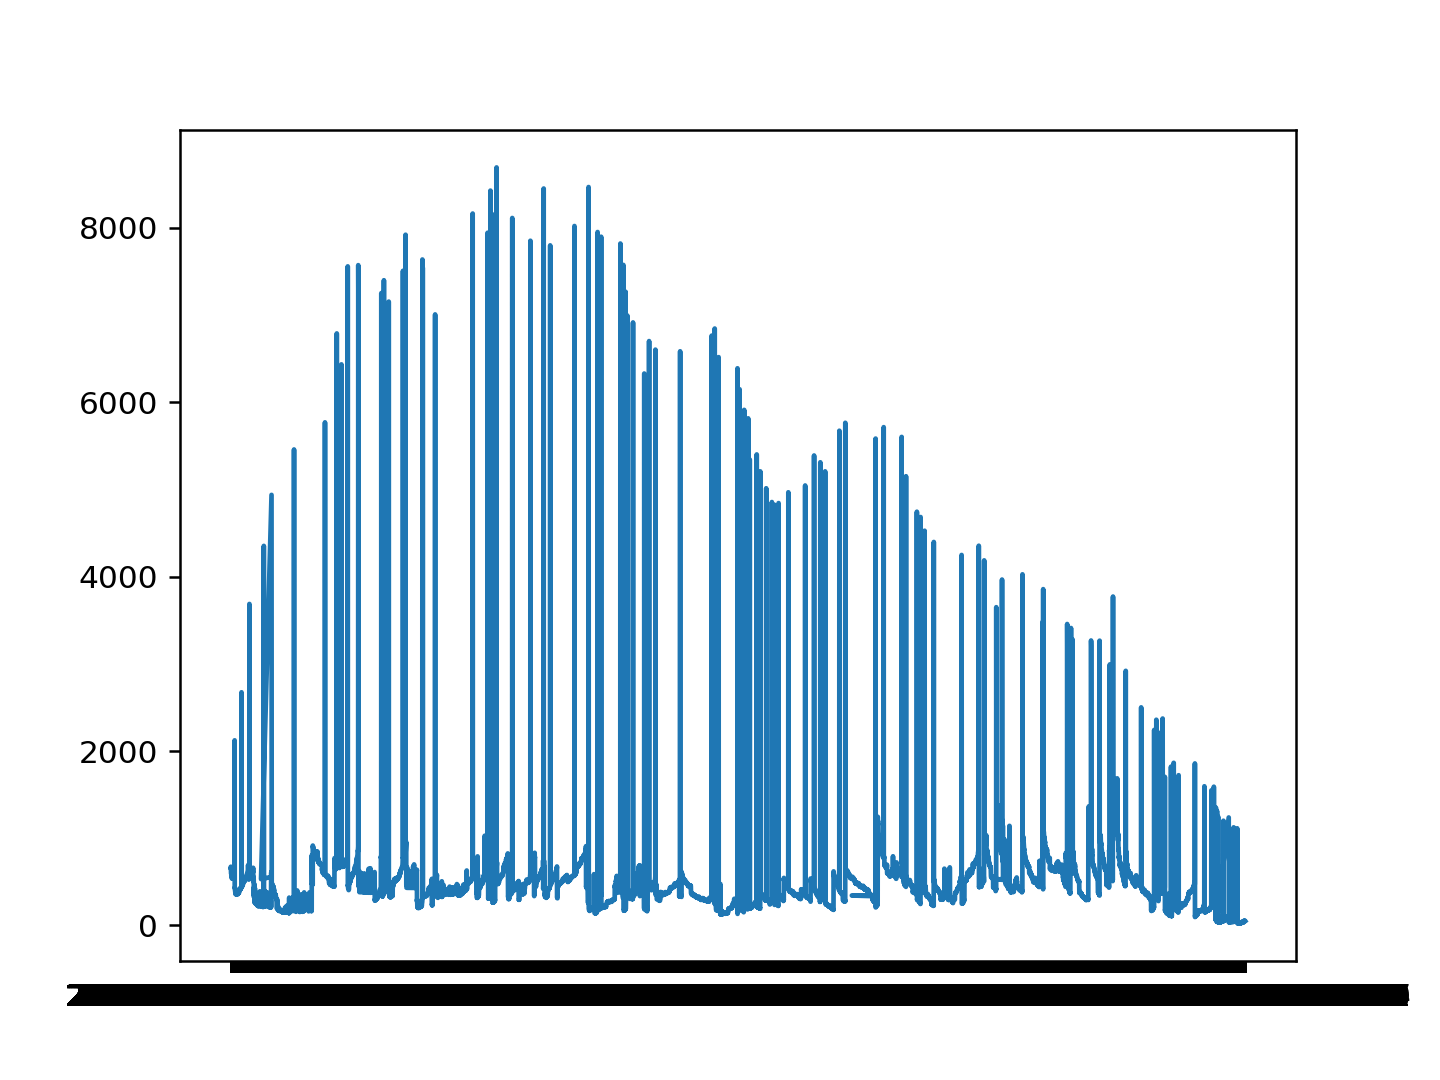

In [84]:
#(df['views'],df['views']).plot()
plt.plot(df['datetaken'], df['views'])
plt.show()